In [90]:
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import roc_curve,auc
from statsmodels.genmod import families
from scipy.stats import shapiro as shp
from scipy.stats import probplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn import svm
from scipy import stats
import seaborn as sns
import pandas as pd 
import numpy as np
import warnings

In [7]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
data=pd.read_csv('Dataset/Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
data.shape

(5000, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### We can see there the dataset has 5000 rows and 14 columns. There are no missing values

### Lets check the distribution of the data

In [37]:
def destribution(df):
    for i in df:
        fig=plt.figure()
        sns.distplot(df[i])

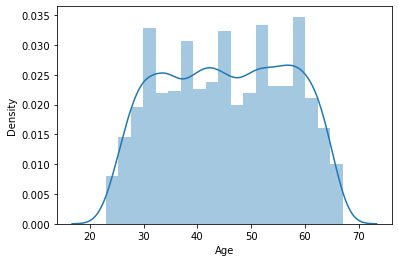

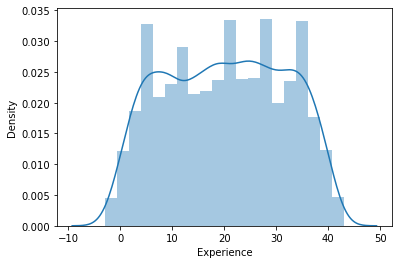

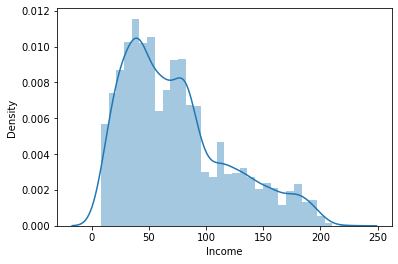

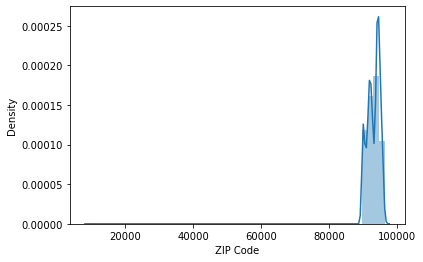

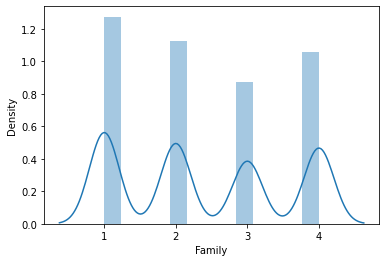

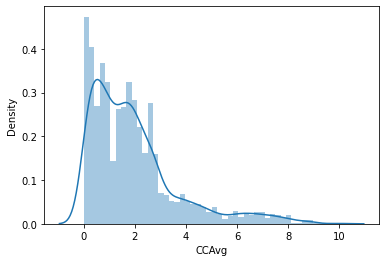

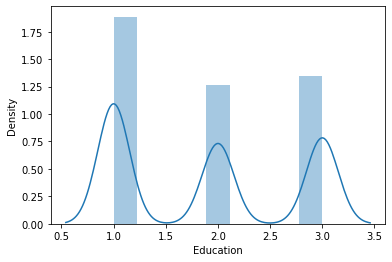

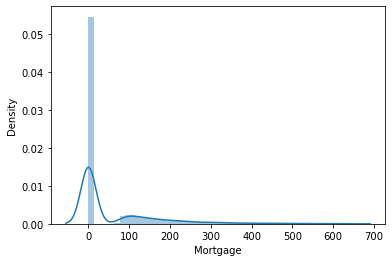

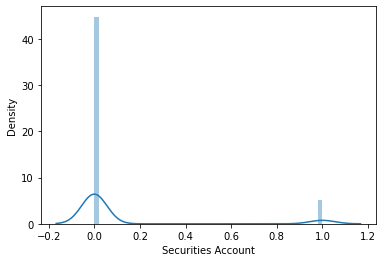

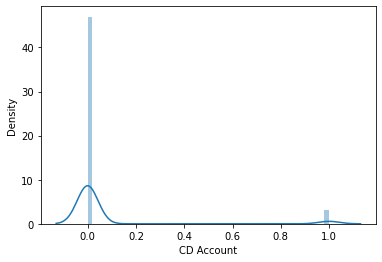

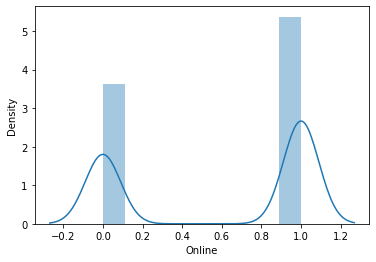

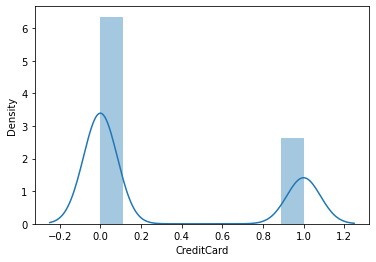

In [38]:
destribution(data.drop(['ID','Personal Loan'],axis=1))

Age, Experience,Income, Mortgage and ccAvg are only continues. Age and Experience are approxmatly uniformly distributed. Income, Mortgage and CCAvg are rightly skewed. Zip code by knwldge we know that it indicates a specific location. Lets reconfirm if the data follows Guassian distribution with the help of Shapiro wilk test and Q-Q plot 

In [53]:
def checkNormality(df):
    conti=['Age','Experience','Income','CCAvg','Mortgage']
    for i in conti:
        print(i)
        fig=plt.figure()
        probplot(df[i],dist='norm',plot=plt)
        print(shp(df[i]))

Age
ShapiroResult(statistic=0.9618571400642395, pvalue=2.251294612491604e-34)
Experience
ShapiroResult(statistic=0.9647437334060669, pvalue=2.7659244321604188e-33)
Income
ShapiroResult(statistic=0.9282411336898804, pvalue=8.688050478813866e-44)
CCAvg
ShapiroResult(statistic=0.8472633957862854, pvalue=0.0)
Mortgage
ShapiroResult(statistic=0.6281889081001282, pvalue=0.0)


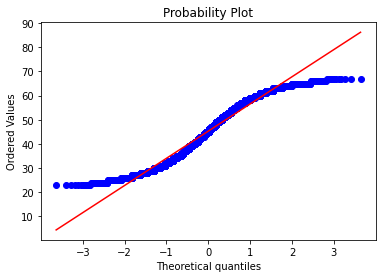

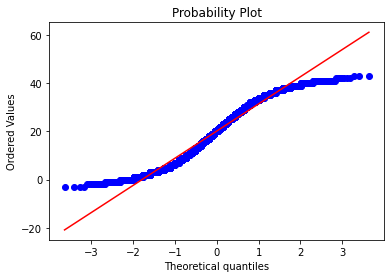

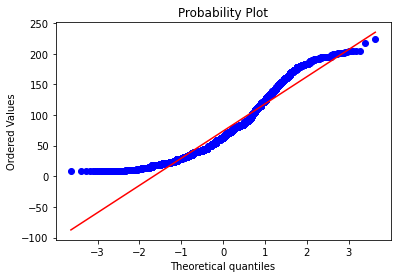

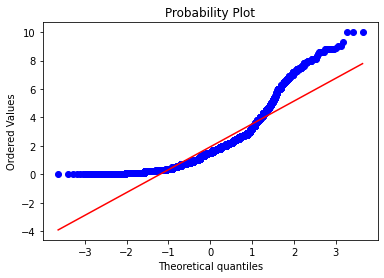

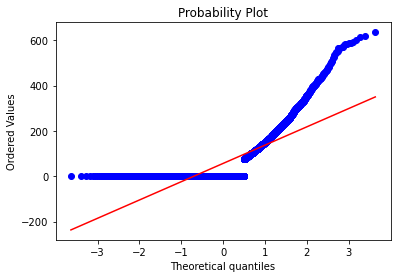

In [54]:
checkNormality(data)

#### Above we can confirm that the data is not following the Guassian distribution

In [56]:
# Values of the descrete variables in the data
for i in data.drop(['ID','Age','Experience','Income','CCAvg','ZIP Code','Mortgage'],axis=1):
    print(i,' = ',data[i].unique())

Family  =  [4 3 1 2]
Education  =  [1 2 3]
Personal Loan  =  [0 1]
Securities Account  =  [1 0]
CD Account  =  [0 1]
Online  =  [0 1]
CreditCard  =  [0 1]


### Checking for the outliers

#### As the data is not following the Guassian distribution lets check the outliers using IQR

In [57]:
def outliersCheck(df):
    for i in df:
        fig=plt.figure()
        sns.boxplot(df[i])

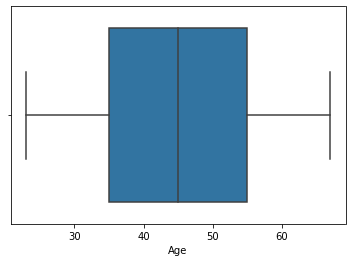

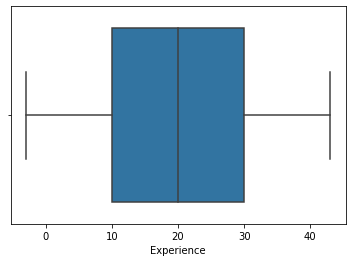

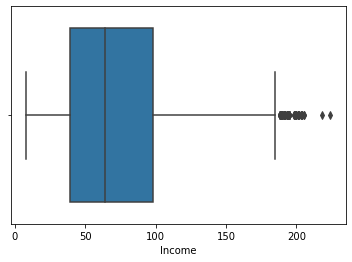

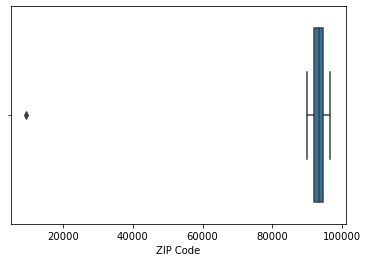

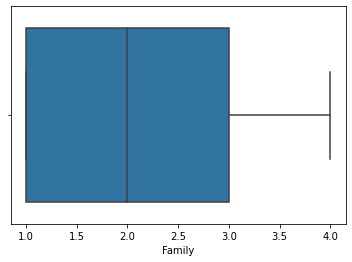

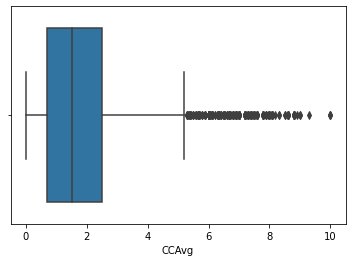

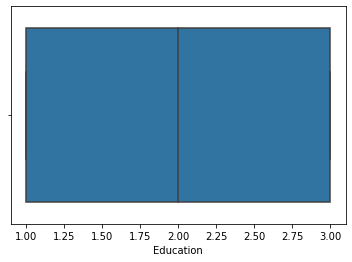

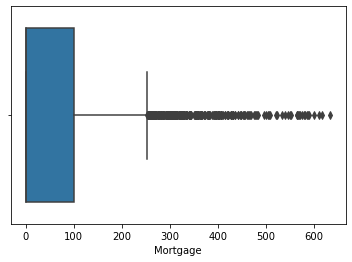

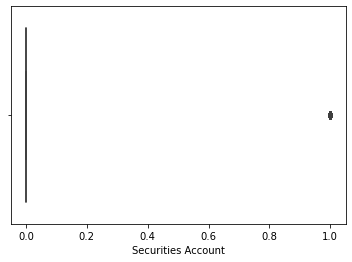

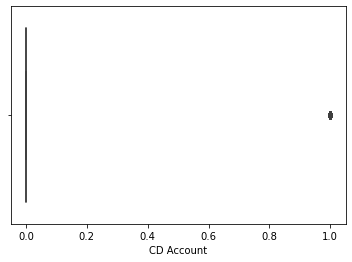

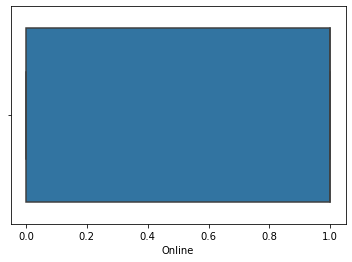

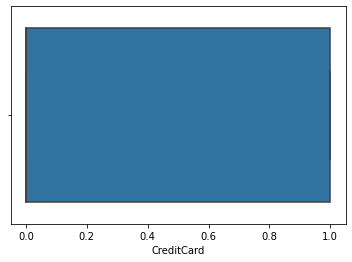

In [58]:
outliersCheck(data.drop(['ID','Personal Loan'],axis=1))

In [60]:
def outliersCount(df):
    
     for i in df:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lowerBound=Q1-(1.5*IQR)
        upperBound=Q3+(1.5*IQR)
        count=0
        for cc in df[i].values:
            if (cc<lowerBound or cc>upperBound):
                count+=1
        print(i,'=','Q1: ',Q1,'Q3:',Q3,'IQR: ',IQR,'lowerlimit: ',lowerBound,'upperLimit: ',upperBound,'Number of outliers: ',count)
        print('---------------------------------------------------------------------------------------------------------------------')

In [61]:
outliersCount(data.drop(['ID','Personal Loan'],axis=1))

Age = Q1:  35.0 Q3: 55.0 IQR:  20.0 lowerlimit:  5.0 upperLimit:  85.0 Number of outliers:  0
---------------------------------------------------------------------------------------------------------------------
Experience = Q1:  10.0 Q3: 30.0 IQR:  20.0 lowerlimit:  -20.0 upperLimit:  60.0 Number of outliers:  0
---------------------------------------------------------------------------------------------------------------------
Income = Q1:  39.0 Q3: 98.0 IQR:  59.0 lowerlimit:  -49.5 upperLimit:  186.5 Number of outliers:  96
---------------------------------------------------------------------------------------------------------------------
ZIP Code = Q1:  91911.0 Q3: 94608.0 IQR:  2697.0 lowerlimit:  87865.5 upperLimit:  98653.5 Number of outliers:  1
---------------------------------------------------------------------------------------------------------------------
Family = Q1:  1.0 Q3: 3.0 IQR:  2.0 lowerlimit:  -2.0 upperLimit:  6.0 Number of outliers:  0
----------------------

 There are multiple outliers. However in this perticular scenario they can the important data point that explains the chances of a person taking loan. So, we are not removing the outliers nor making any changes to them

In [63]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can see that experiace has a minimum value -3 and we know that experience cannot be negetive value so replacing the negetive values of the experience column with it's mean

In [69]:
data['Experience']=data['Experience'].replace(to_replace=[i for i in data['Experience'].values],value=data['Experience'].mean())    

In [71]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.1046,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,0.0000,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,20.1046,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,20.1046,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.1046,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,20.1046,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,20.1046,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Above we can see the experience column is also completly positive

Since there are outliers and as they can be the important data points, Naive bayes could be the better choice. However as it is given in statement to perform Logistic regression, Naive Bayes and KNN implimenting all the models and comparing them

### Linearity of independent variables and log-odds

Box-Tidwell tranformation(test) can be used to check the linearity in the logit assumption

In [74]:
conti=['Age','Experience','Income','CCAvg','Mortgage']
zeros={}
for i in conti:
    count=0
    for val in data[i].values:
        if val==0:
            count+=1
    zeros[i]=count
zeros


{'Age': 0, 'Experience': 0, 'Income': 0, 'CCAvg': 106, 'Mortgage': 3462}

In [83]:
# Box Tidwell only works with positive values hence dropping the values of zero

dataZ=data.drop(data[data.CCAvg==0].index)
dataZ=dataZ.drop(dataZ[dataZ.Mortgage==0].index)

In [86]:
dataY=dataZ[['Personal Loan']]
for i in dataZ.columns:
    if i not in conti:
        dataZ=dataZ.drop(i,axis=1)
dataZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 5 to 4996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1509 non-null   int64  
 1   Experience  1509 non-null   float64
 2   Income      1509 non-null   int64  
 3   CCAvg       1509 non-null   float64
 4   Mortgage    1509 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 70.7 KB


In [87]:
dataY.head()

,Personal Loan
5,0
8,0
16,1
20,0
22,0


In [88]:
for col in dataZ.columns:
    dataZ[f'{col}:Log_{col}']=dataZ[col].apply(lambda x:x*np.log(x))
dataZ.head()

,Age,Experience,Income,CCAvg,Mortgage,Age:Log_Age,Experience:Log_Experience,Income:Log_Income,CCAvg:Log_CCAvg,Mortgage:Log_Mortgage
5,37,20.1046,29,0.4,155,133.603963,60.332872,97.651579,-0.366516,781.730893
8,35,20.1046,81,0.6,104,124.437182,60.332872,355.950382,-0.306495,483.016654
16,38,20.1046,130,4.7,134,138.228274,60.332872,632.779479,7.273544,656.310533
20,56,20.1046,25,0.9,111,225.419695,60.332872,80.471896,-0.094824,522.757852
22,29,20.1046,62,1.2,260,97.651579,60.332872,255.882332,0.218786,1445.777224


In [91]:
dataZ=sm.add_constant(dataZ,prepend=False)

logisticResult=GLM(dataY,dataZ,family=families.Binomial()).fit()
print(logisticResult.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Personal Loan   No. Observations:                 1509
Model:                            GLM   Df Residuals:                     1500
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -282.85
Date:                Fri, 17 Dec 2021   Deviance:                       565.70
Time:                        22:53:50   Pearson chi2:                     931.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                   

From above we can see that Experience:Log_Experience, Income:Log_Income, CCAvg:Log_CCAvg are statestically significant(i.e, p<=0.05) indication the presence of non-linearity between them and logit. We can perform tranformations on these by adding higher-order polynomial. However I am at present building the model without tranformations   